In [1]:
#packages import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
#import data
OrchardInfo = pd.read_csv("VeganBerry_Orchard_Updated_Per_Tree.csv")

In [3]:
#data review
OrchardInfo.tail()

,Week,Fertilizer added (cubic feet),Fertilizer Measured,Mulch added \n(inches),Mulch Measured,Rain,Watering\n(gallons),Nutrition Lvl,Moisture,Temp,...,Trees Planted,Total_Yield,Material_Cost_Mulch \n(5*Total Trees*\nmulch per tree),Application_Cost_Mulch\n(0.5 * Cost of Labor *total trees\n *Mulch Applied Boolean value),Material_Cost_Fertilizer\n(5*Total Trees*\nFertilizer per tree),Application_Cost_Fert(1/8 hrs)\n(0.125 * Cost of Labor *total trees\n *Fertilizer Applied Boolean value),Cost_Water \n(0.10*Total Trees*\nGallons per tree),Total_Yield_Revenue\n($0.25 *total Yield),Total Cost \n(Material Cost +Application Cost),Total Profit in $\n(Total Revenue- \nTotal Cost)
463,48,NaN,0.0,NaN,2.95,0.21,NaN,100,20,67,...,0,2227,0,0,0.0,0.0,0.0,556.75,0.0,556.75
464,49,NaN,0.0,NaN,2.80,0.28,5.0,100,18,63,...,0,1310,0,0,0.0,0.0,65.5,327.50,65.5,262.00
465,50,NaN,0.0,NaN,2.65,0.36,NaN,100,17,59,...,0,1179,0,0,0.0,0.0,0.0,294.75,0.0,294.75
466,51,NaN,0.0,NaN,2.50,0.47,5.0,100,15,55,...,0,524,0,0,0.0,0.0,65.5,131.00,65.5,65.50
467,52,NaN,0.0,NaN,2.35,0.59,NaN,100,15,51,...,0,393,0,0,0.0,0.0,0.0,98.25,0.0,98.25


In [4]:
#Transform to df
Orchard = OrchardInfo[["Week","Fertilizer Measured","Mulch Measured","Rain","Nutrition Lvl","Moisture","Temp","Orchard","Location","Total Watered","Total Trees","Total_Yield"]]
Orchard= Orchard.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
Orchard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Week                 468 non-null    int64  
 1   Fertilizer Measured  468 non-null    float64
 2   Mulch Measured       468 non-null    float64
 3   Rain                 468 non-null    float64
 4   Nutrition Lvl        468 non-null    int64  
 5   Moisture             468 non-null    int64  
 6   Temp                 468 non-null    int64  
 7   Orchard              468 non-null    object 
 8   Location             468 non-null    object 
 9   Total Watered        468 non-null    int64  
 10  Total Trees          468 non-null    int64  
 11  Total_Yield          468 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 44.0+ KB


In [5]:
#df for individual orchard/farm
groups = Orchard.groupby('Orchard') 
category_dfs = {}
for category, group in groups:
    category_dfs[category] = group
    
Outgrowth_Orchards = category_dfs['Outgrowth Orchards']	
Organic_Gardens = category_dfs['Organic Gardens']
Frugal_Farms= category_dfs['Frugal Farms']
PowerHouse_Plantation= category_dfs['PowerHouse Plantation']
Gargantian_Grove= category_dfs['Gargantian Grove']
Berry_Bonds= category_dfs['Berry Bonds']
Friendly_Farmstead= category_dfs['Friendly Farmstead']
Nancy_Nursery= category_dfs['Nancy Nursery']
Easygoing_Estates= category_dfs['Easygoing Estates']

Text(0.5, 0.98, 'Orchard Dataset Pairplot')

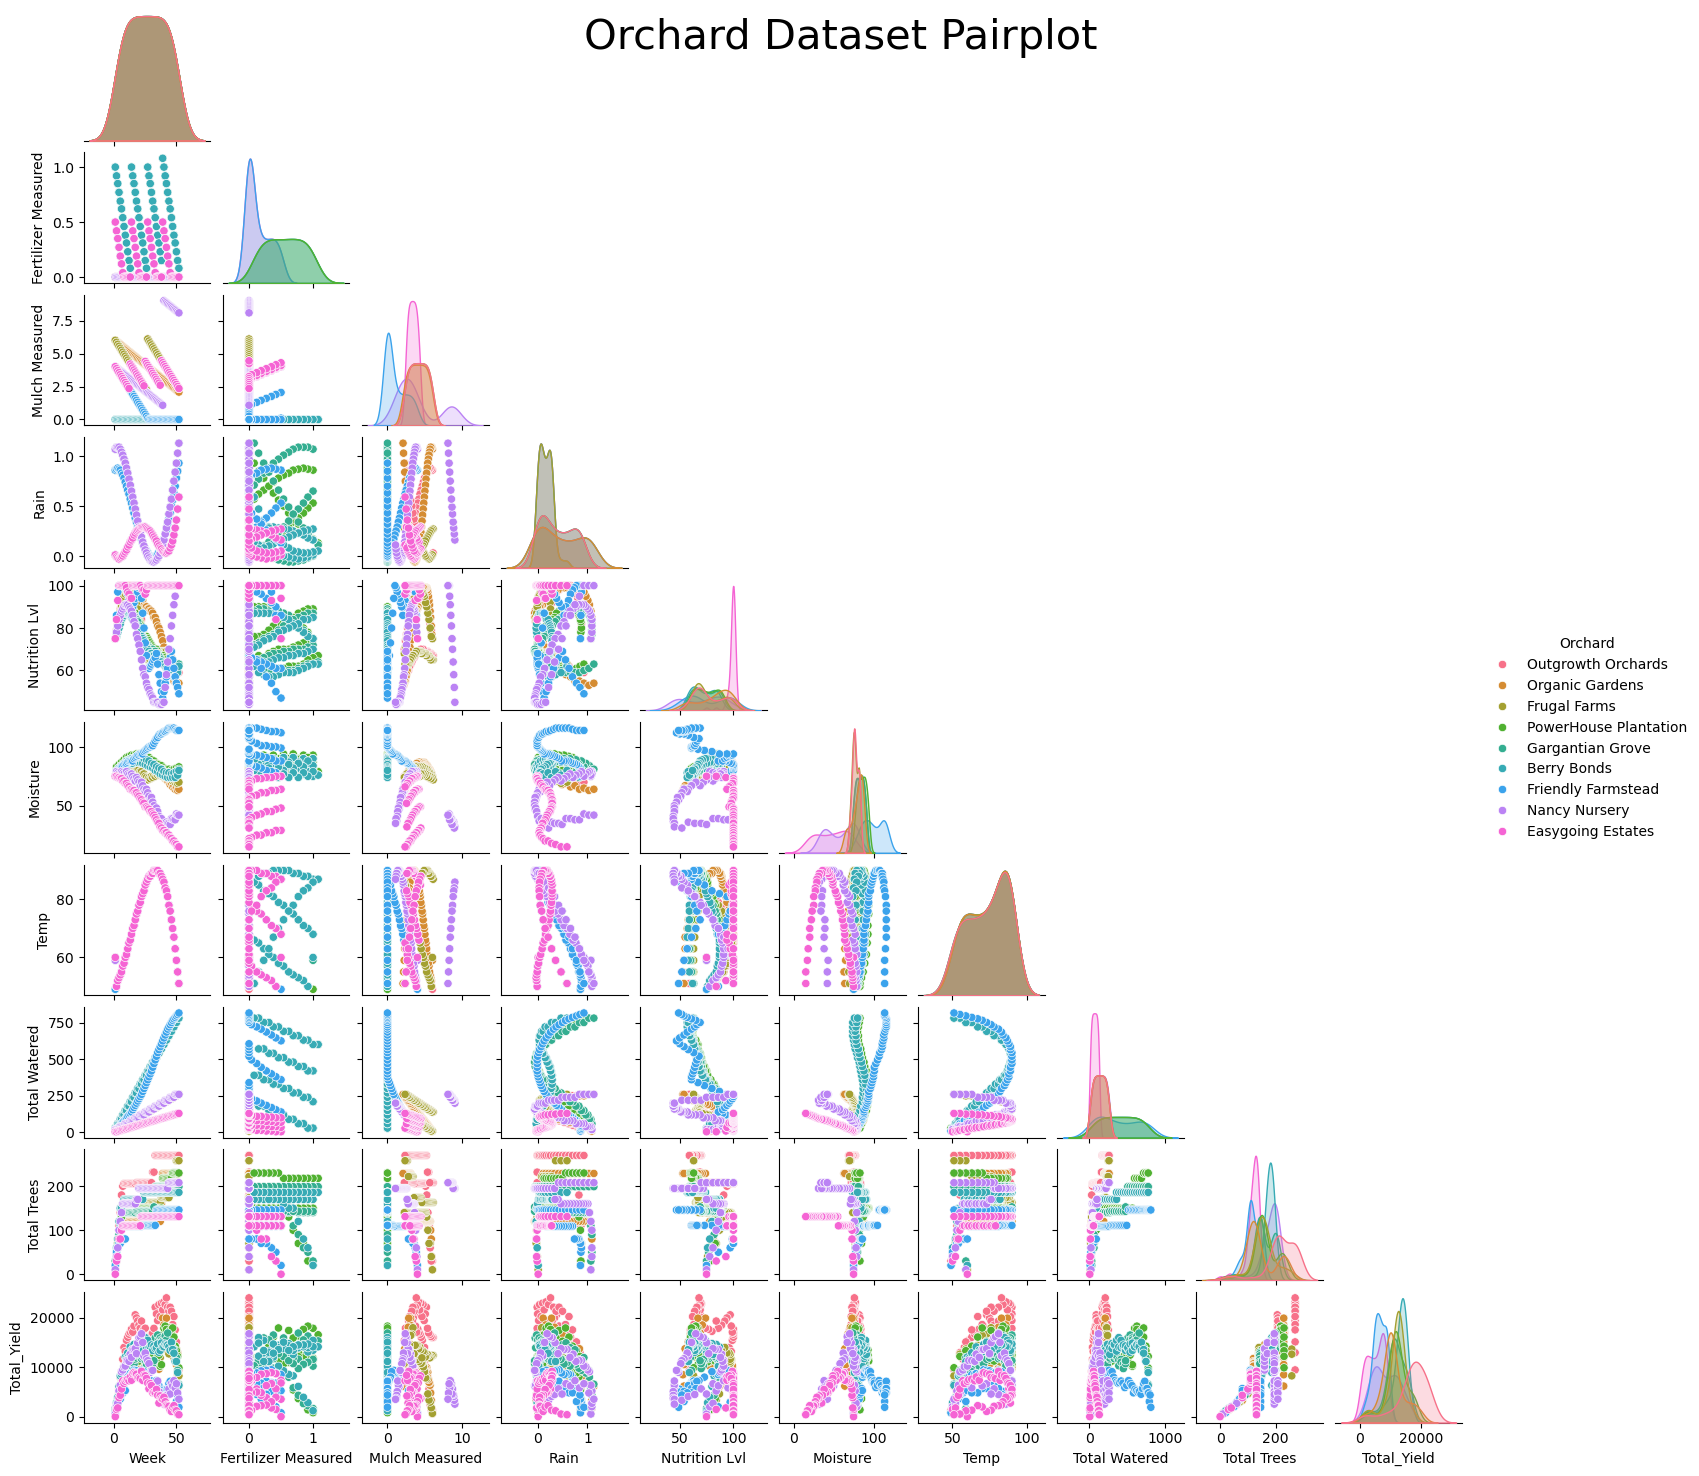

In [6]:
#pairplot of all variables broken down by orchard name
OrchardPlot = sns.pairplot(Orchard, corner = True, palette = 'husl', hue = "Orchard", height = 1.5)
# for title
OrchardPlot.fig.suptitle('Orchard Dataset Pairplot',fontsize = 30)

In [7]:
#individual columns for each parameter
Mulch_Measured= Orchard['Mulch Measured']
Total_Yield = Orchard['Total_Yield']
Nutrition_Lvl = Orchard['Nutrition Lvl']
Fertilizer_Measured= Orchard['Fertilizer Measured']
Rain= Orchard["Rain"]
Total_Watered = Orchard["Total Watered"]
Rain_Watered=Orchard["Rain"]+Orchard["Total Watered"]
Moisture= Orchard["Moisture"]
Temp= Orchard["Temp"]
Week = Orchard["Week"]
hue = Orchard["Orchard"]
Total_Trees= Orchard["Total Trees"]
categories = hue.unique()

Text(0, 0.5, 'Total_Yield(lbs of berries)')

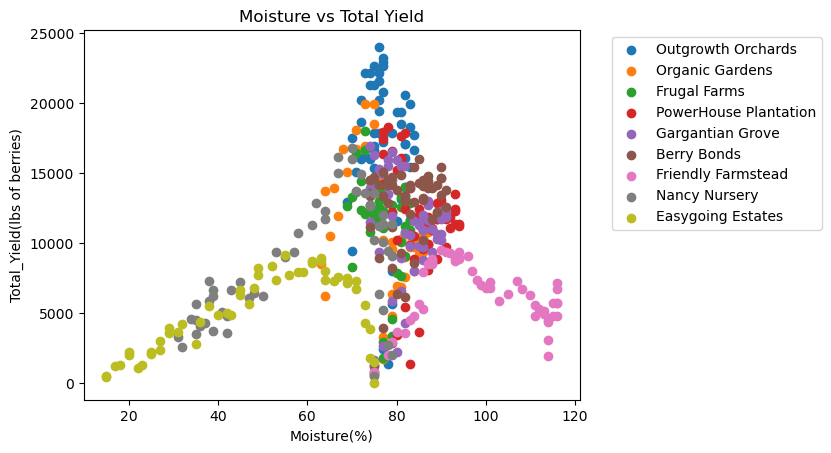

In [8]:
#scatter plot nutrition level vs weekly yield
for category in categories:
    plt.scatter(Moisture[hue == category],Total_Yield[hue == category],label=category)
plt.title('Moisture vs Total Yield')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

plt.xlabel('Moisture(%)')
plt.ylabel('Total_Yield(lbs of berries)')


Text(0, 0.5, 'Total_Yield(lbs of berries)')

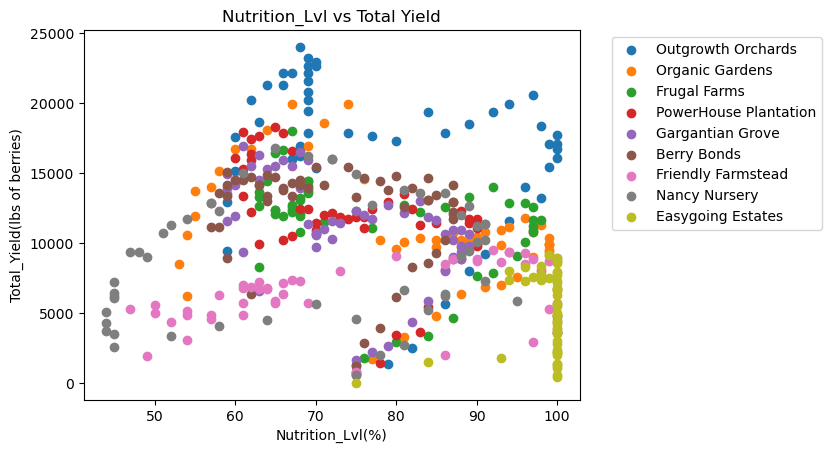

In [9]:
#scatter plot nutrition level vs weekly yield
for category in categories:
    plt.scatter(Nutrition_Lvl[hue == category],Total_Yield[hue == category],label=category)
plt.title('Nutrition_Lvl vs Total Yield')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

plt.xlabel('Nutrition_Lvl(%)')
plt.ylabel('Total_Yield(lbs of berries)')


Text(0, 0.5, 'Total_Yield(lbs of berries)')

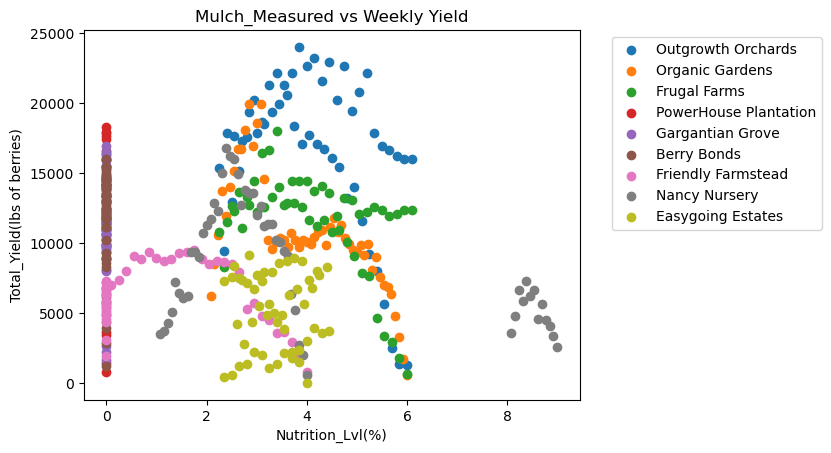

In [10]:

#scatter plot nutrition level vs weekly yield
for category in categories:
    plt.scatter(Mulch_Measured[hue == category],Total_Yield[hue == category],label=category)
plt.title('Mulch_Measured vs Weekly Yield')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')

plt.xlabel('Nutrition_Lvl(%)')
plt.ylabel('Total_Yield(lbs of berries)')


Text(0, 0.5, 'Total_Yield(lbs of berries)')

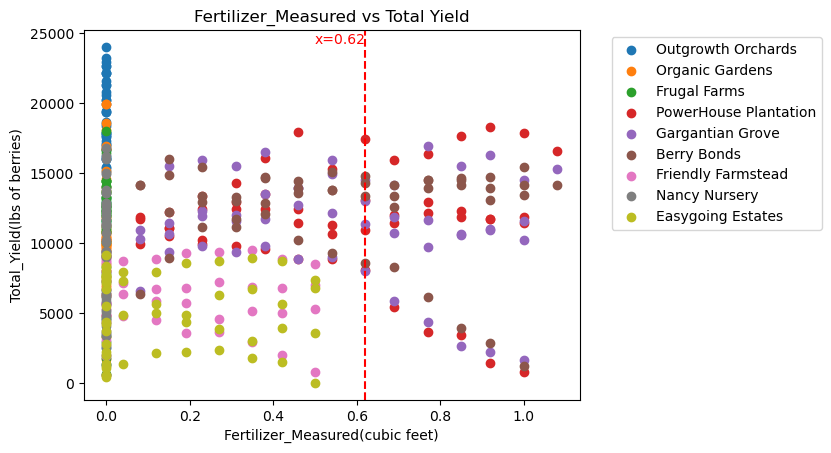

In [11]:
for category in categories:
    plt.scatter(Fertilizer_Measured[hue == category],Total_Yield[hue == category],label=category)
plt.title('Fertilizer_Measured vs Total Yield')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left')
specific_x = 0.62
plt.axvline(x=specific_x, color='r', linestyle='--')
plt.text(specific_x, max(Total_Yield), f'x={0.62}', ha='right', va='bottom', color='r')

plt.xlabel('Fertilizer_Measured(cubic feet)')
plt.ylabel('Total_Yield(lbs of berries)')

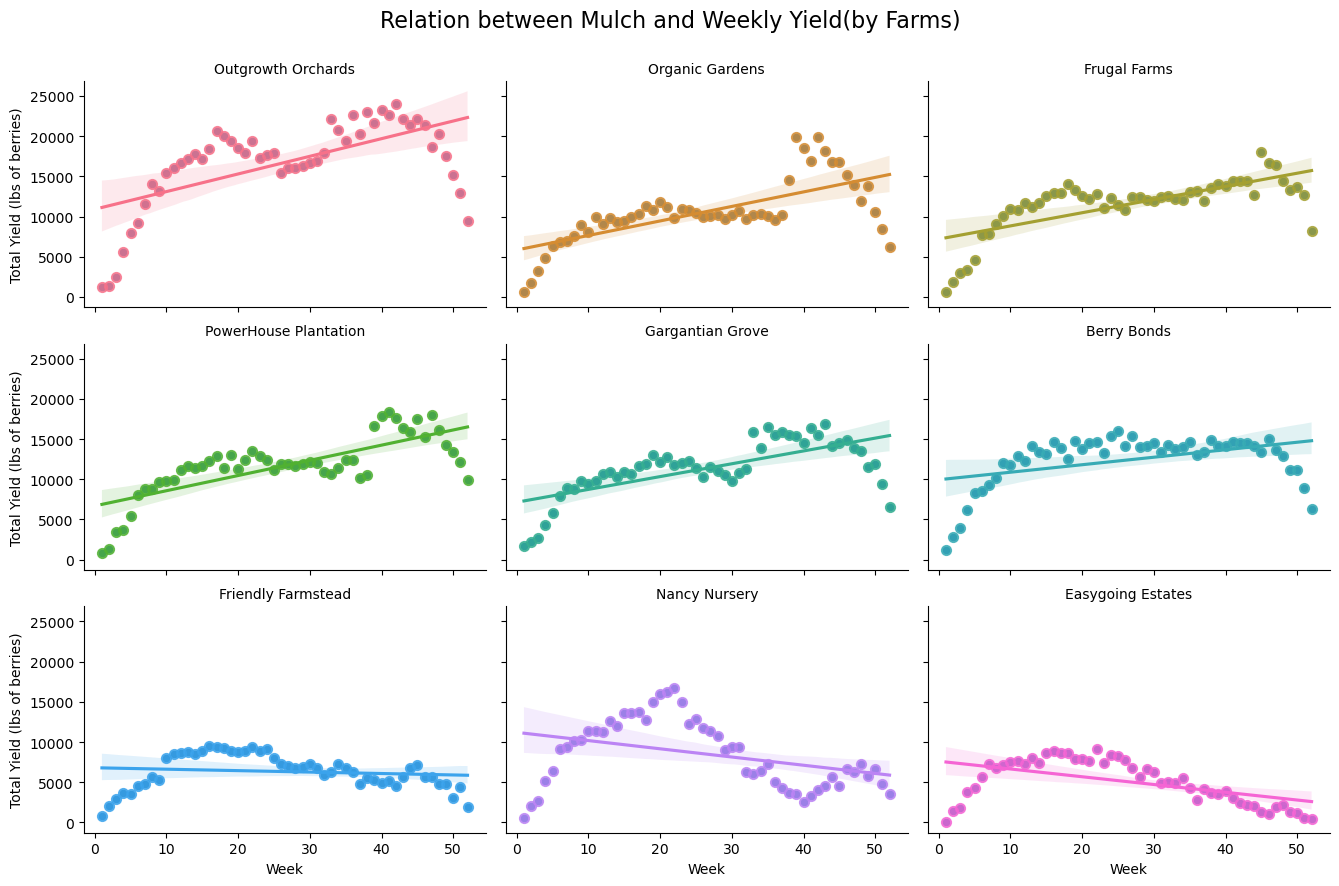

In [12]:
#Initial Yield Trend analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Map the scatterplot to the grid
g.map(sns.scatterplot, "Week", "Total_Yield")

# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Week', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Mulch and Weekly Yield(by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Week", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()

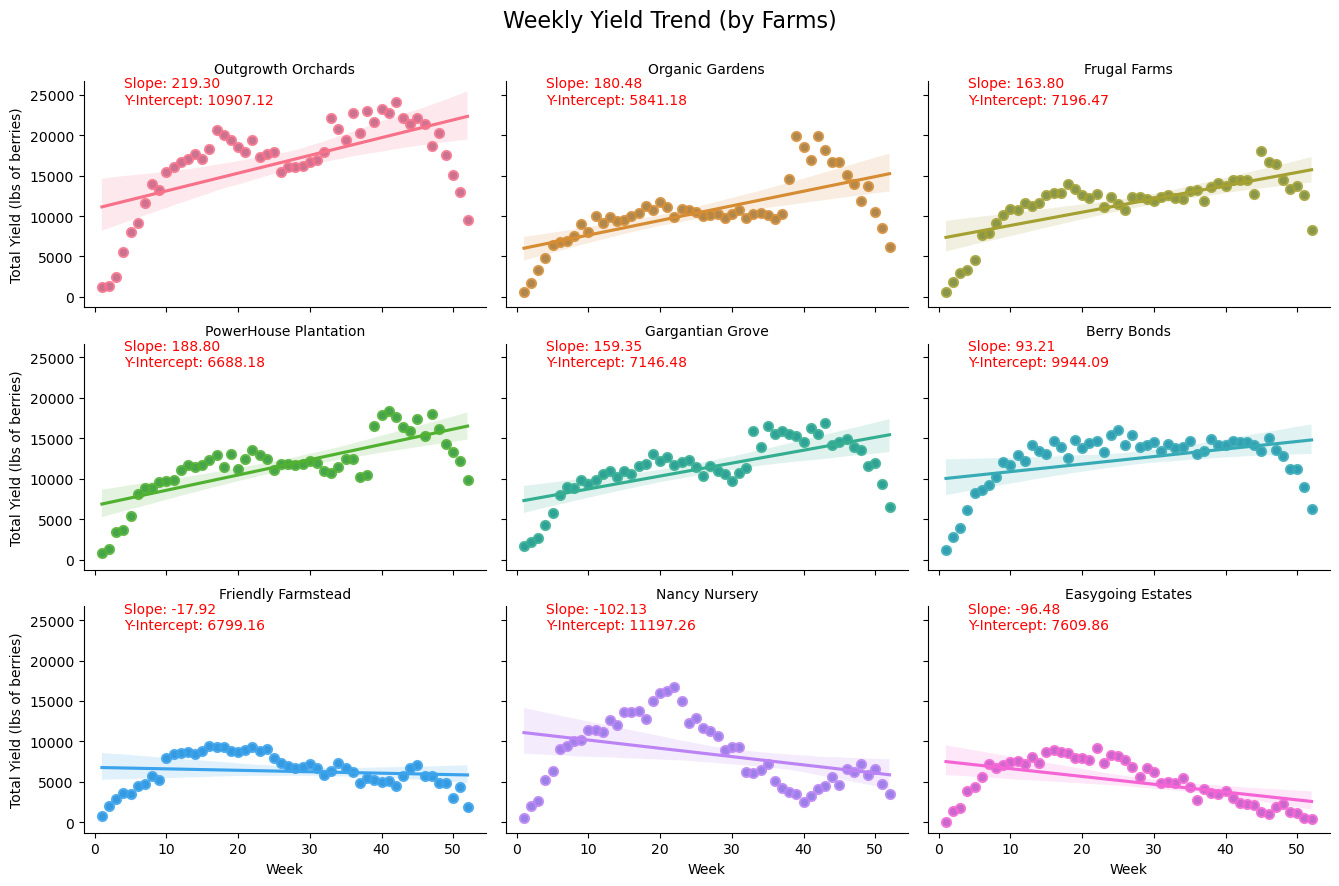

In [13]:
#Linear Regression analysis of weekly yield with y-intercept info and slope
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept

# Map the scatterplot to the grid
g.map(sns.scatterplot, "Week", "Total_Yield")

# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Week', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Week'], subdata['Total_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Weekly Yield Trend (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Week", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()



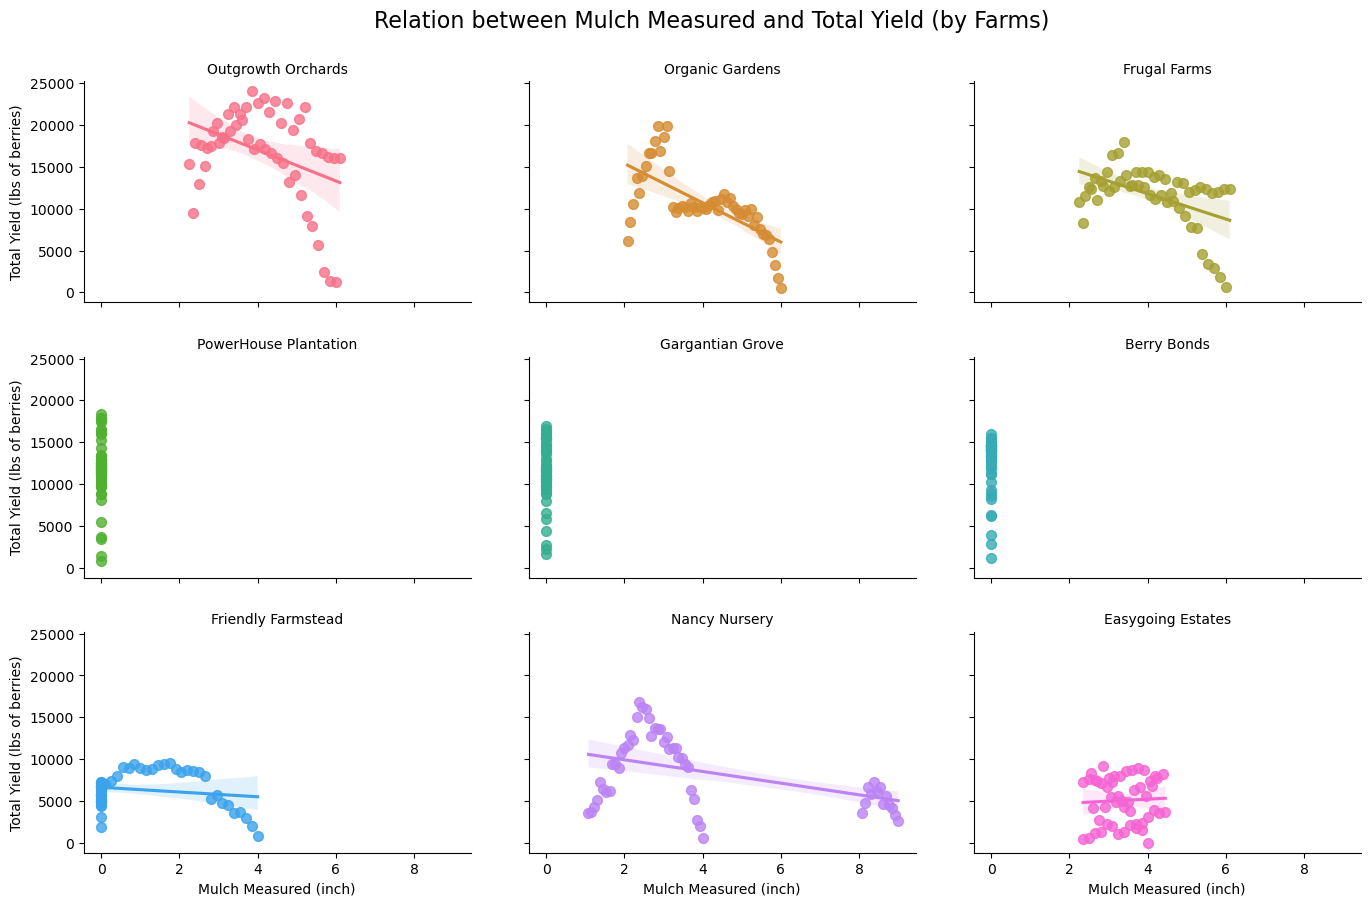

In [14]:
#Linear Regression analysis of mulch measured vs weekly yield
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Mulch Measured', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Mulch Measured and Total Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Mulch Measured (inch)", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()



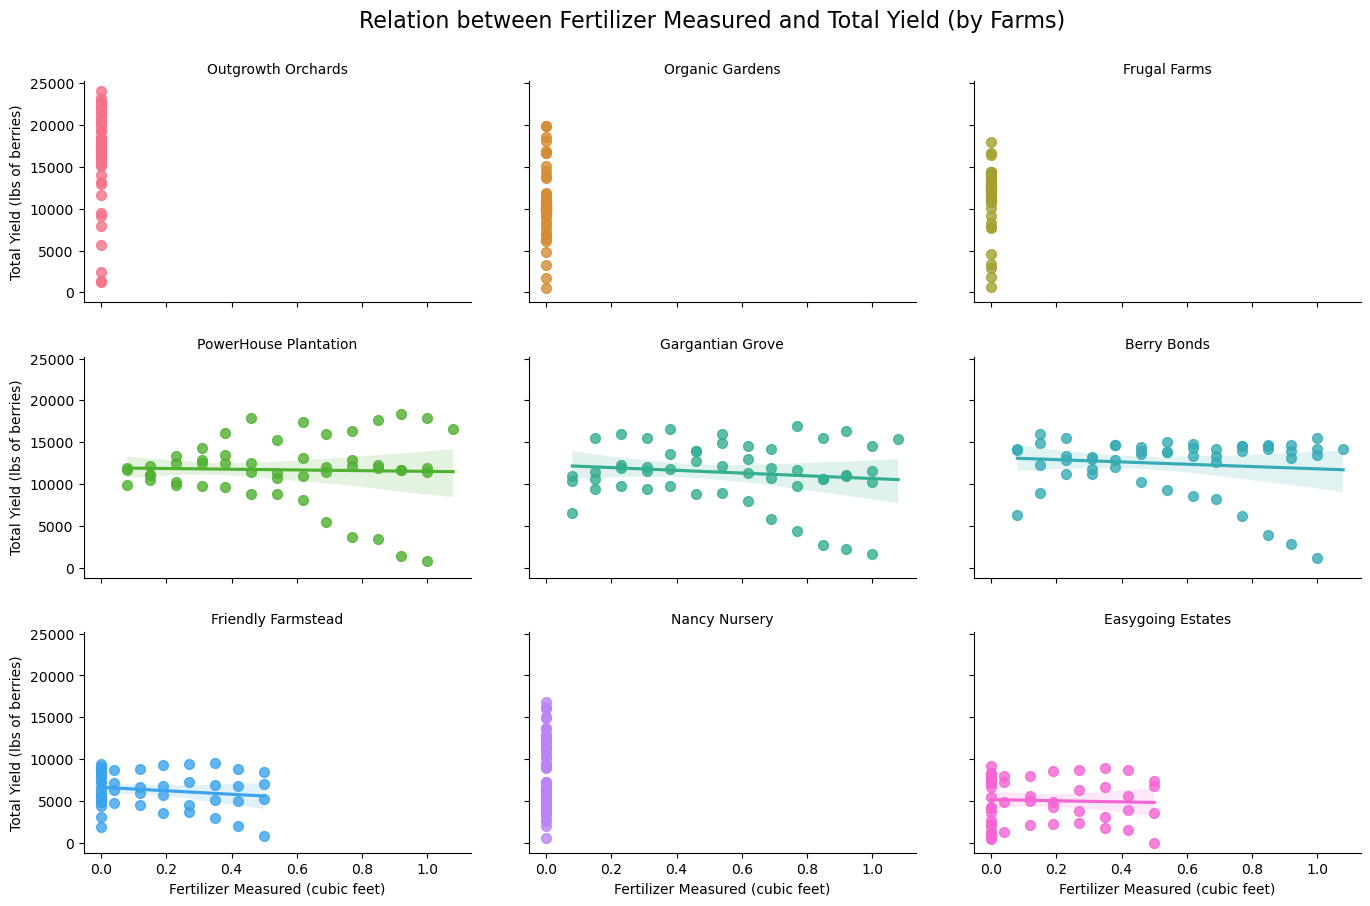

In [15]:
#Linear Regression analysis of fertilizer measured vs weekly yield
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Fertilizer Measured', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Fertilizer Measured and Total Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Fertilizer Measured (cubic feet)", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()



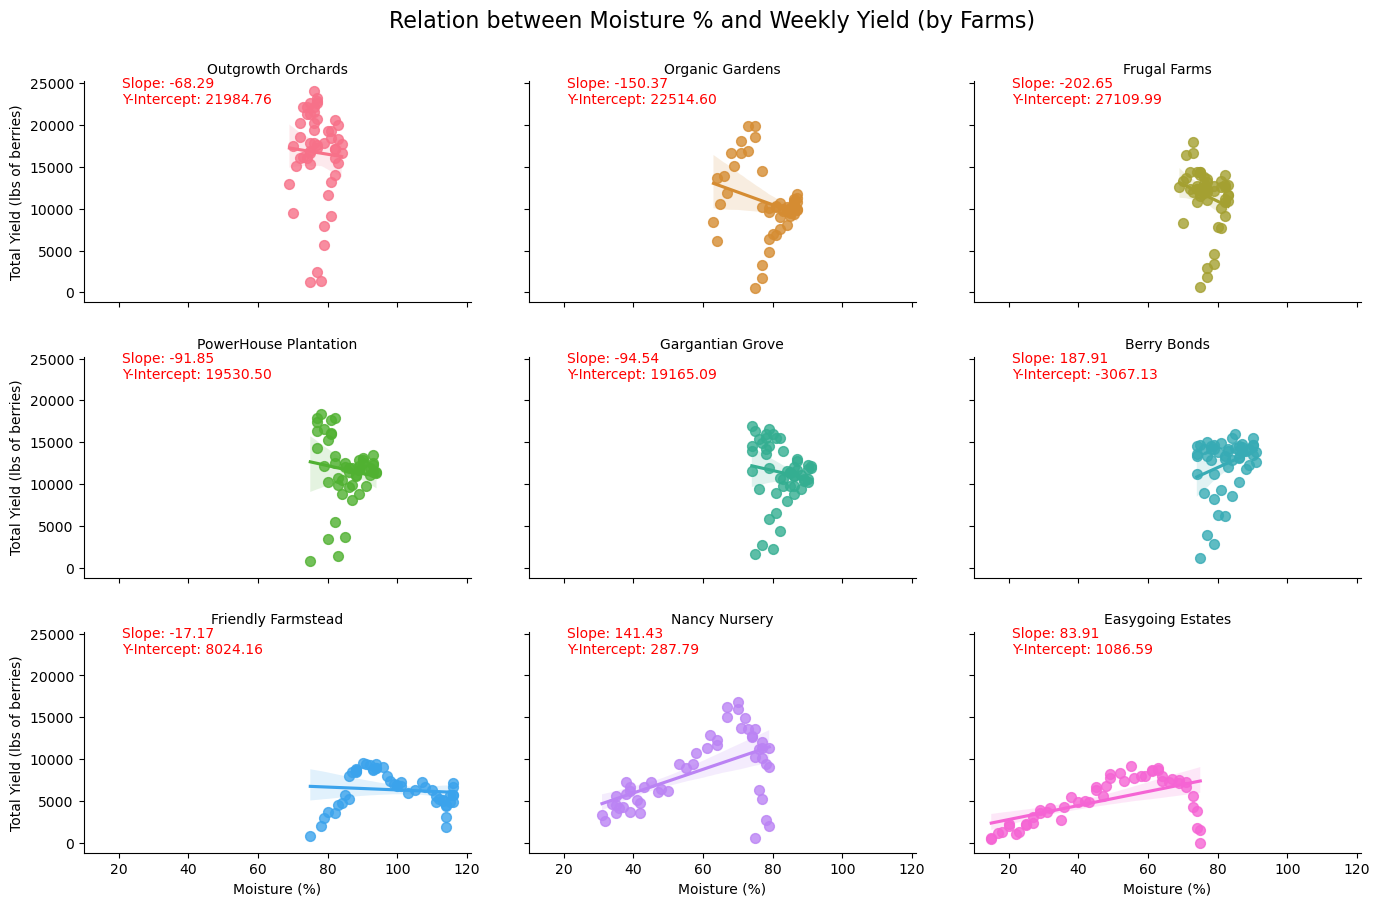

In [16]:
#Linear Regression analysis of moisture % vs weekly yield (slope and y-intercept info included)
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Moisture', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Moisture'], subdata['Total_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Moisture % and Weekly Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Moisture (%)", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


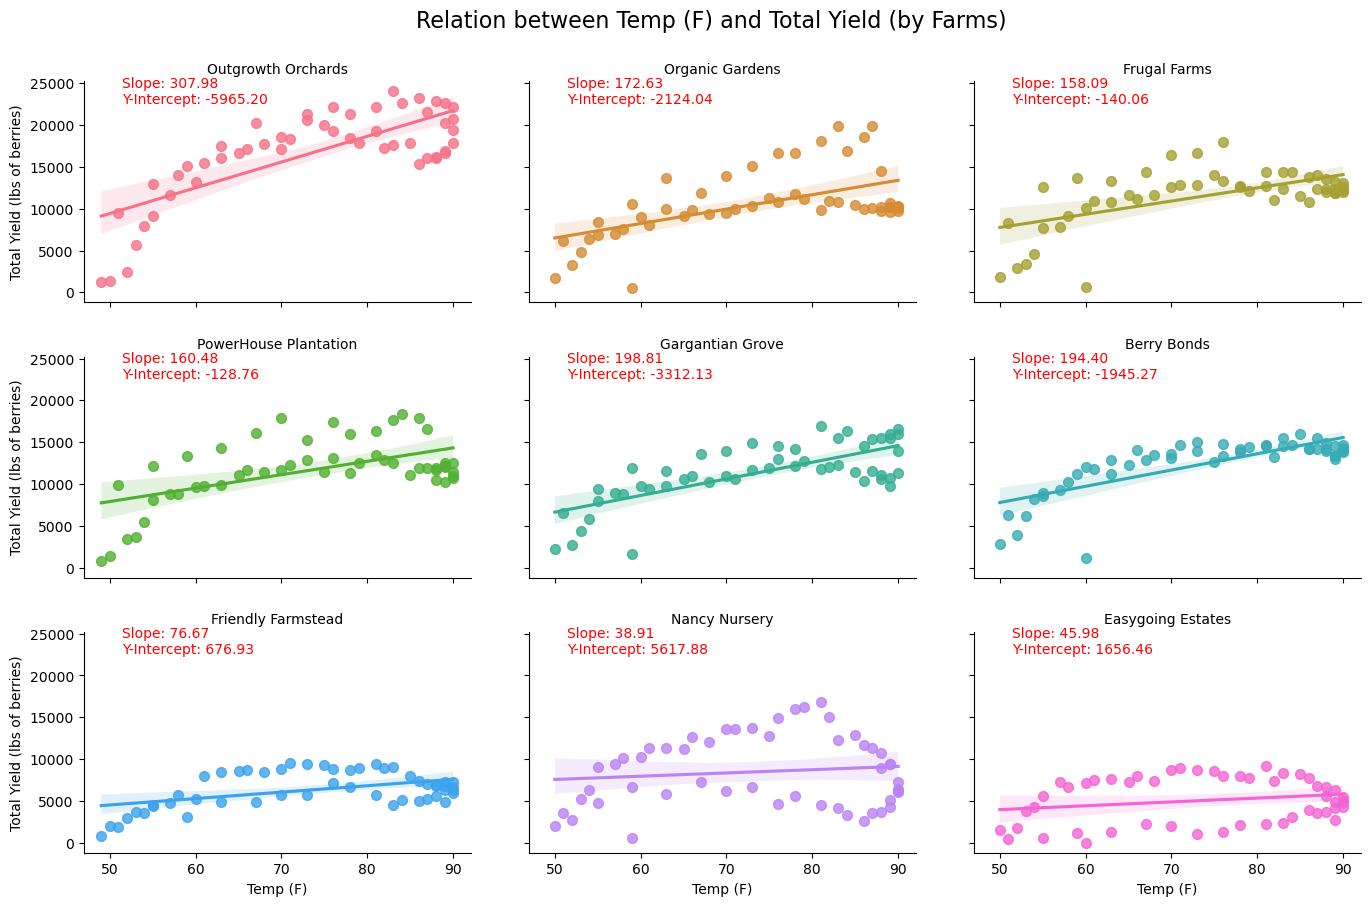

In [17]:
#Linear Regression analysis of moisture % vs weekly yield (slope and y-intercept info included)
# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Temp', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Temp'], subdata['Total_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Temp (F) and Total Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Temp (F)", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


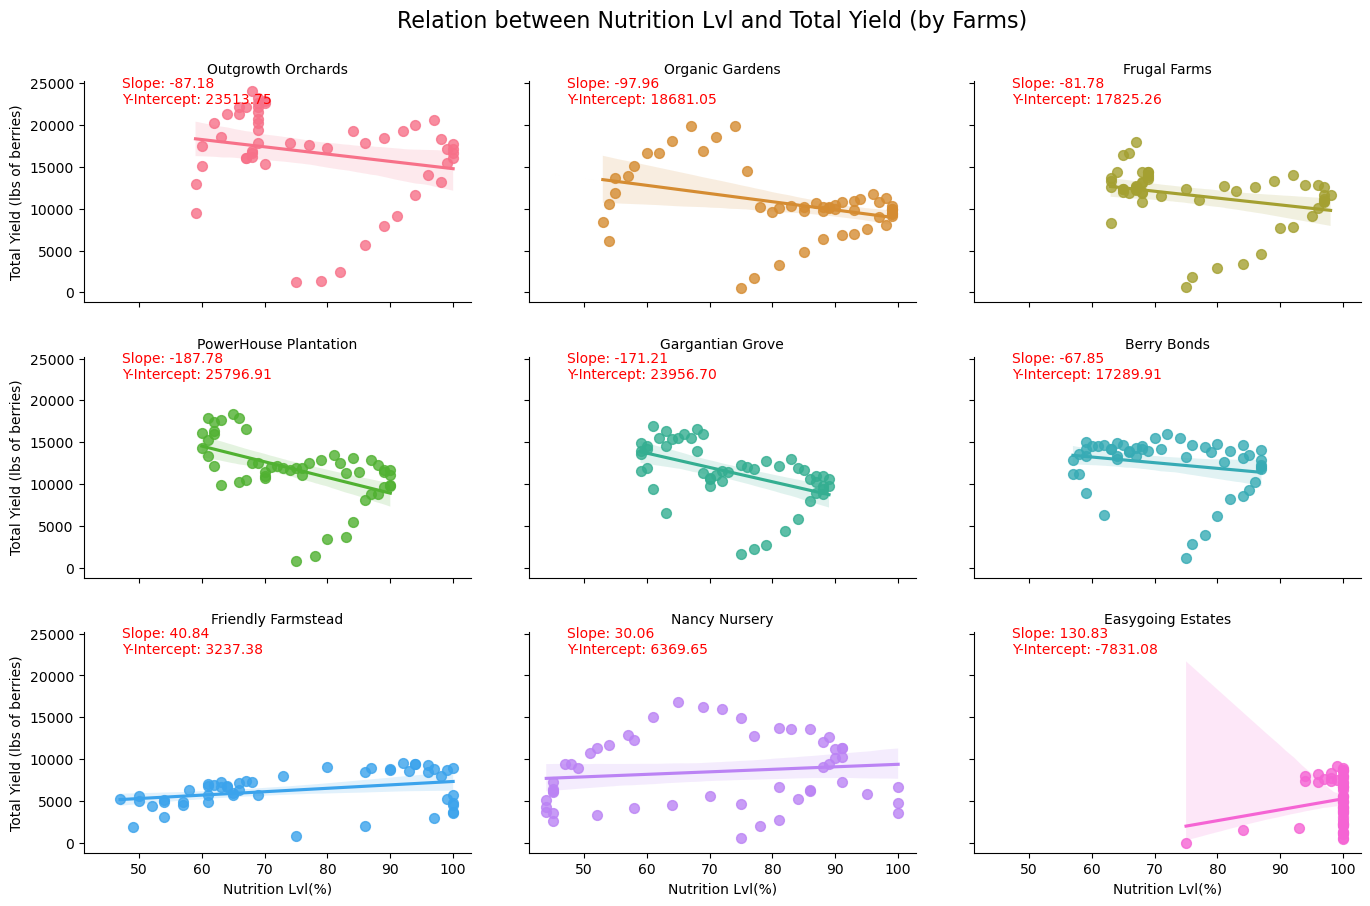

In [18]:
#Linear Regression analysis of Nutrition Lvl vs weekly yield (slope and y-intercept info included)

# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Nutrition Lvl', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Nutrition Lvl'], subdata['Total_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Nutrition Lvl and Total Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Nutrition Lvl(%)", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()


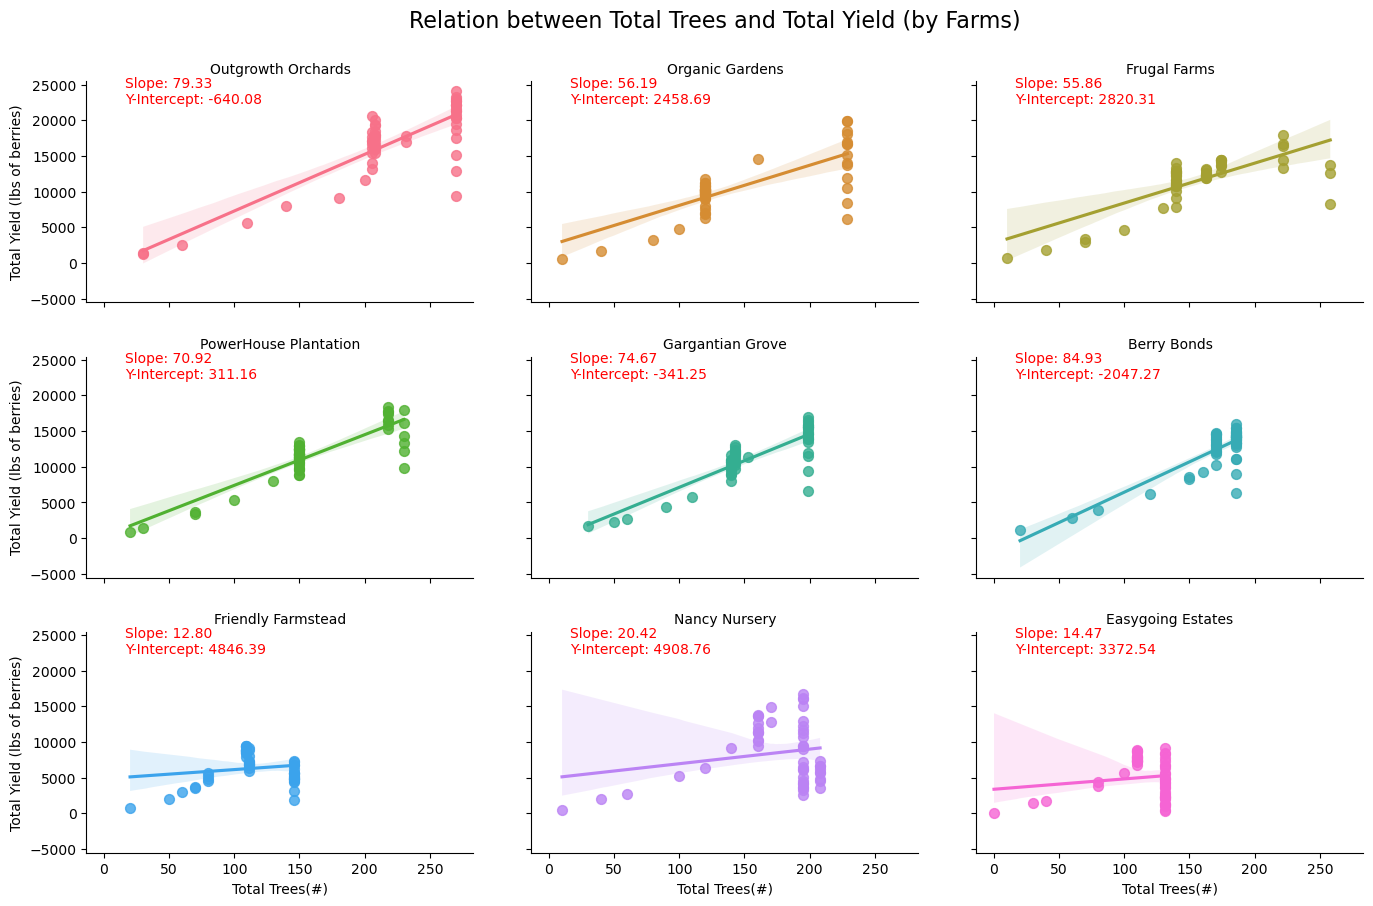

In [19]:
#Linear Regression analysis of Nutrition Lvl vs weekly yield (slope and y-intercept info included)

# Define a custom color palette
palette = sns.color_palette("husl", len(Orchard['Orchard'].unique()))

# Create a FacetGrid
g = sns.FacetGrid(Orchard, col="Orchard", col_wrap=3, height=3, aspect=1.5)

# Function to calculate slope and y-intercept
def calculate_slope_intercept(x, y):
    coeffs = np.polyfit(x, y, 1)  # Fit a linear regression model
    slope = coeffs[0]
    intercept = coeffs[1]
    return slope, intercept


# Map the regression plot to the grid with custom colors
for ax, hue in zip(g.axes.flatten(), Orchard['Orchard'].unique()):
    subdata = Orchard[Orchard['Orchard'] == hue]  # Filter data for the current hue
    sns.regplot(x='Total Trees', y='Total_Yield', data=subdata, ax=ax, color=palette[list(Orchard['Orchard'].unique()).index(hue)], scatter_kws={'s': 50})
    
    # Calculate slope and y-intercept
    slope, intercept = calculate_slope_intercept(subdata['Total Trees'], subdata['Total_Yield'])
    
    # Annotate the slope and y-intercept on the plot
    ax.text(0.1, 0.9, f'Slope: {slope:.2f}\nY-Intercept: {intercept:.2f}', transform=ax.transAxes, fontsize=10, color='red')

# Add a main title
plt.subplots_adjust(top=0.9)  # Adjust the top to make space for the title
g.fig.suptitle('Relation between Total Trees and Total Yield (by Farms)', fontsize=16)

# Add titles and labels
g.set_axis_labels("Total Trees(#)", "Total Yield (lbs of berries)")
g.set_titles(col_template="{col_name}")

# Show the plot
plt.show()